In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob
import re
from scipy.special import exp1
from scipy.special import expi

## Approach

Our goal is to check theoretical predictions for the moments/cumulants of $P$ vs. simulation results.

### Method: Uniform

Eq. 38 in the manuscript gives the MGF of $P$ in the uniform case:

$$\text{MGF}_P(z)=\left(1-\frac{z}{sN}\right)^{-\mu N}$$

Taking derivatives with respect to $z$ we can derive the first two moments as follows:

$$
\begin{align}
\mathbb{E}[P]&=\frac{d}{dz}\text{MGF}_P\bigg|_{z=0}\\
&=\frac{d}{dz}\left(1-\frac{z}{sN}\right)^{-\mu N}\bigg|_{z=0}\\
&=\frac{\mu}{s}\left(1-\frac{z}{sN}\right)^{-\mu N-1}\bigg|_{z=0}\\
&=\frac{\mu}{s}
\end{align}
$$

$$
\begin{align}
\mathbb{E}[P^2]&=\frac{d^2}{dz^2}\text{MGF}_P\bigg|_{z=0}\\
&=\frac{d}{dz}\frac{\mu}{s}\left(1-\frac{z}{sN}\right)^{-\mu N-1}\bigg|_{z=0}\\
&=\frac{\mu}{s^2}\left(\mu+\frac{1}{N}\right)\left(1-\frac{z}{sN}\right)^{-\mu N-2}\bigg|_{z=0}\\
&=\frac{\mu}{s^2}\left(\mu+\frac{1}{N}\right)
\end{align}
$$

### Method: Spatial


Eq. 48 in manuscript gives the MGF of $P$:

$$
\text{MGF}_P=\text{exp}\left(\mu\rho_N\ell_c^2\sum_{k=0}^\infty\varepsilon^k\hat{u}_k(\vec{0},0)\right)
$$

Truncating the sum at the $j$-th term gives the first $j$ moments.

Truncate at $j=2$:
$$
\text{MGF}_P\approx\text{exp}\left(\mu\rho_N\ell_c^2\left(\hat{u}_0(\vec{0},0)+\varepsilon\hat{u}_1(\vec{0},0)+\varepsilon^2\hat{u}_2(\vec{0},0)\right)\right)
$$

Note that $\varepsilon$ is defined as follows:
$$\varepsilon=\frac{z}{s\rho_N\ell_c^2}$$

Also note that $\hat{u}_0=0$ and $\hat{u}_1(\vec{0},0)=1$, per methods section.

####  First Moment
$$
\begin{align*}
\mathbb{E}[P] &= \frac{d}{dz}\text{MGF}_P\Bigg|_{z=0}\\
&= \frac{d}{d\varepsilon}\frac{d\varepsilon}{dz}\text{MGF}_P\Bigg|_{z=0}\\
&= \frac{d\varepsilon}{dz}\frac{d}{d\varepsilon}\text{MGF}_P\Bigg|_{z=0}\\
&=\frac{1}{s\rho_N\ell_c^2}\left[\text{exp}\left(\mu\rho_N\ell_c^2\left(\hat{u}_0(\vec{0},0)+\varepsilon\hat{u}_1(\vec{0},0)+\varepsilon^2\hat{u}_2(\vec{0},0)\right)\right)\cdot\frac{d}{d\varepsilon}\mu\rho_N\ell_c^2\left(\hat{u}_0(\vec{0},0)+\varepsilon\hat{u}_1(\vec{0},0)+\varepsilon^2\hat{u}_2(\vec{0},0)\right)\Bigg|_{\varepsilon=0}\right]\\
&=\frac{1}{s\rho_N\ell_c^2}\left[\text{exp}\left(\mu\rho_N\ell_c^2\left(\hat{u}_0(\vec{0},0)+\varepsilon\hat{u}_1(\vec{0},0)+\varepsilon^2\hat{u}_2(\vec{0},0)\right)\right)\cdot\mu\rho_N\ell_c^2\left(\hat{u}_1(\vec{0},0)+2\varepsilon\hat{u}_2(\vec{0},0)\right)\Bigg|_{\varepsilon=0}\right]\\
&=\frac{1}{s\rho_N\ell_c^2}\left[\mu\rho_N\ell_c^2\left(\hat{u}_1(\vec{0},0)\right)\text{exp}\left(\mu\rho_N\ell_c^2\left(\hat{u}_0(\vec{0},0)\right)\right)\right]\\
&=\frac{\mu}{s}\hat{u}_1(\vec{0},0)\cdot\text{exp}\left(\mu\rho_N\ell_c^2\left(\hat{u}_0(\vec{0},0)\right)\right)\\
&=\frac{\mu}{s}
\end{align*}
$$

#### Second Moment

$$
\begin{align}
\mathbb{E}[P^2]&=\frac{d^2}{dz^2}\text{MGF}_P\Bigg|_{z=0}\\
&=\frac{d^2}{d\varepsilon^2}\frac{d\varepsilon^2}{dz^2}\text{MGF}_P\Bigg|_{z=0}\\
&=\frac{d\varepsilon^2}{dz^2}\frac{d^2}{d\varepsilon^2}\text{MGF}_P\Bigg|_{z=0}\\
&=\left(\frac{1}{s\rho_N\ell_c^2}\right)^2\left[\frac{d}{d\varepsilon}\text{exp}\left(\mu\rho_N\ell_c^2\left(\hat{u}_0(\vec{0},0)+\varepsilon\hat{u}_1(\vec{0},0)+\varepsilon^2\hat{u}_2(\vec{0},0)\right)\right)\cdot\mu\rho_N\ell_c^2\left(\hat{u}_1(\vec{0},0)+2\varepsilon\hat{u}_2(\vec{0},0)\right)\Bigg|_{\varepsilon=0}\right]\\
&=\left(\frac{1}{s\rho_N\ell_c^2}\right)^2\left[\text{exp}\left(\mu\rho_N\ell_c^2\left(\hat{u}_0(\vec{0},0)+\varepsilon\hat{u}_1(\vec{0},0)+\varepsilon^2\hat{u}_2(\vec{0},0)\right)\right)\cdot\left[\mu\rho_N\ell_c^2\left(\hat{u}_1(\vec{0},0)+2\varepsilon\hat{u}_2(\vec{0},0)\right)\right]^2+2\mu\rho_N\ell_c^2\hat{u}_2(\vec{0},0)\cdot\text{exp}\left(\mu\rho_N\ell_c^2\left(\hat{u}_0(\vec{0},0)+\varepsilon\hat{u}_1(\vec{0},0)+\varepsilon^2\hat{u}_2(\vec{0},0)\right)\right)\Bigg|_{\varepsilon=0}\right]\\
&=\left(\frac{1}{s\rho_N\ell_c^2}\right)^2\left[\text{exp}\left(\mu\rho_N\ell_c^2\hat{u}_0(\vec{0},0)\right)\cdot\left(\mu\rho_N\ell_c^2\hat{u}_1(\vec{0},0)\right)^2+2\mu\rho_N\ell_c^2\hat{u}_2(\vec{0},0)\cdot\text{exp}\left(\mu\rho_N\ell_c^2\hat{u}_0(\vec{0},0)\right)\right]\\
&=\left(\frac{\mu}{s}\right)^2+\frac{2\mu}{s^2\rho_N\ell_c^2}\hat{u}_2(\vec{0},0)
\end{align}
$$

To summarize:

$$\mathbb{E}[P]=\frac{\mu}{s}$$

$$\mathbb{E}[P^2]=\left(\frac{\mu}{s}\right)^2+\frac{2\mu}{s^2\rho_N\ell_c^2}\hat{u}_2(\vec{0},0)$$

## Results

### Uniform

In [91]:
def get_EP(mu,s):
    return mu/s

def get_EPsquared_unif(mu,s,N):
    return (mu/s**2)*(mu+1/N)

def get_moments_unif(files):
    res = np.zeros((len(files),10))
    for i,f in enumerate(files):
        matches = re.match(r'.*/s([\d.]+)_n(\d+)_mu([\d.e-]+)_rho(\d+)_L(\d+)_maxcount(\d+)_sigma([\d.]+)_seed(\d+)_iter(\d+)_r([\d.]+)_uniform.sfs',f)
        s, n, mu, rho, L, maxcount, sigma, seed, iteration, r = matches.groups()
        s = float(s)
        mu = float(mu)
        rho = int(rho)
        sigma = float(sigma)
        sim_data = pd.read_csv(f,header=None)
        N = rho*float(L)**2
        res[i,:] = [s,mu,rho,sigma,get_EP(mu,s),get_EPsquared_unif(mu,s,N),sim_data.iloc[0,0],sim_data.iloc[1,0],sim_data.iloc[2,0],get_mean_count(sim_data[0].tolist())]

    res = pd.DataFrame(res,columns=['s','mu','rho','sigma','theory_firstmoment','theory_secondmoment','xi0','xi1','xi2','mean_count'])
    res['theory_xi0'] = 1-2*res['theory_firstmoment']+res['theory_secondmoment']
    res['theory_xi1'] = 2*res['theory_firstmoment']-2*res['theory_secondmoment']
    res['theory_xi2'] = res['theory_secondmoment']
    res['theory_xi2'] = res['theory_secondmoment']
    res['theory_meancount'] = 2*res['theory_firstmoment']
    return res
    

def plot_moments_unif(files,title="Moments: sim vs theory"):
    res = get_moments_unif(files)
    unique_rho_values = sorted(res['rho'].unique())
    unique_mu_values = sorted(res['mu'].unique())
    colors = ['red','blue','green']
    color_dict = dict(zip(unique_mu_values, colors))
    marker_shapes = ["^",'+','x']
    
    fig,axs = plt.subplots(2,2,figsize=(24,24))
    legend_handles = []
    for i, mu_value in enumerate(sorted(res['mu'].unique())):
            res_mu = res[(res['mu'] == mu_value)]
            for j, s_value in enumerate(sorted(res['s'].unique())):
                res_s = res_mu[res_mu['s'] == s_value]
                marker_size = 500#5000/(-np.log10(mu_value))
                label=r'$\mu$='+str(mu_value)+r', $s$='+str(s_value)
                axs[0,0].scatter(res_s['theory_xi0'], res_s['xi0'], color=color_dict[mu_value], label=label, marker=marker_shapes[j], s=marker_size)
                axs[0,1].scatter(res_s['theory_meancount'],res_s['mean_count'],color=color_dict[mu_value], label=label, marker=marker_shapes[j], s=marker_size)
                axs[1,0].scatter(res_s['theory_xi1'], res_s['xi1'], color=color_dict[mu_value], label=label, marker=marker_shapes[j], s=marker_size)
                axs[1,1].scatter(res_s['theory_xi2'], res_s['xi2'], color=color_dict[mu_value], label=label, marker=marker_shapes[j], s=marker_size)
                
    axs[0,0].plot(np.logspace(np.log10(0.8),np.log10(1.2)),np.logspace(np.log10(0.8),np.log10(1.2)),color='black')
    axs[0,0].set_xlabel("theory")
    axs[0,0].set_ylabel("simulation")
    axs[0,0].legend()
    axs[0,0].set_title(r"$\mathbb{E}[(1-P)^2]$")

    axs[0,1].plot(np.logspace(-6,-2),np.logspace(-6,-2),color='black')
    axs[0,1].set_xscale('log')
    axs[0,1].set_yscale('log')
    axs[0,1].set_xlabel("theory")
    axs[0,1].set_ylabel("simulation")
    axs[0,1].legend()
    axs[0,1].set_title(r"$\mathbb{E}[2P]$")

    axs[1,0].plot(np.logspace(-6,-2),np.logspace(-6,-2),color='black')
    axs[1,0].set_xscale('log')
    axs[1,0].set_yscale('log')
    axs[1,0].set_xlabel("theory")
    axs[1,0].set_ylabel("simulation")
    axs[1,0].legend()
    axs[1,0].set_title(r"$\mathbb{E}[2P(1-P)]$")
    
    axs[1,1].plot(np.logspace(-12,-5),np.logspace(-12,-5),color='black')
    axs[1,1].set_xscale('log')
    axs[1,1].set_yscale('log')
    axs[1,1].set_xlabel("theory")
    axs[1,1].set_ylabel("simulation")
    axs[1,1].legend()
    axs[1,1].set_title(r"$\mathbb{E}[P^2]$")
    
    fig.suptitle(title,y=0.9)
    plt.show()

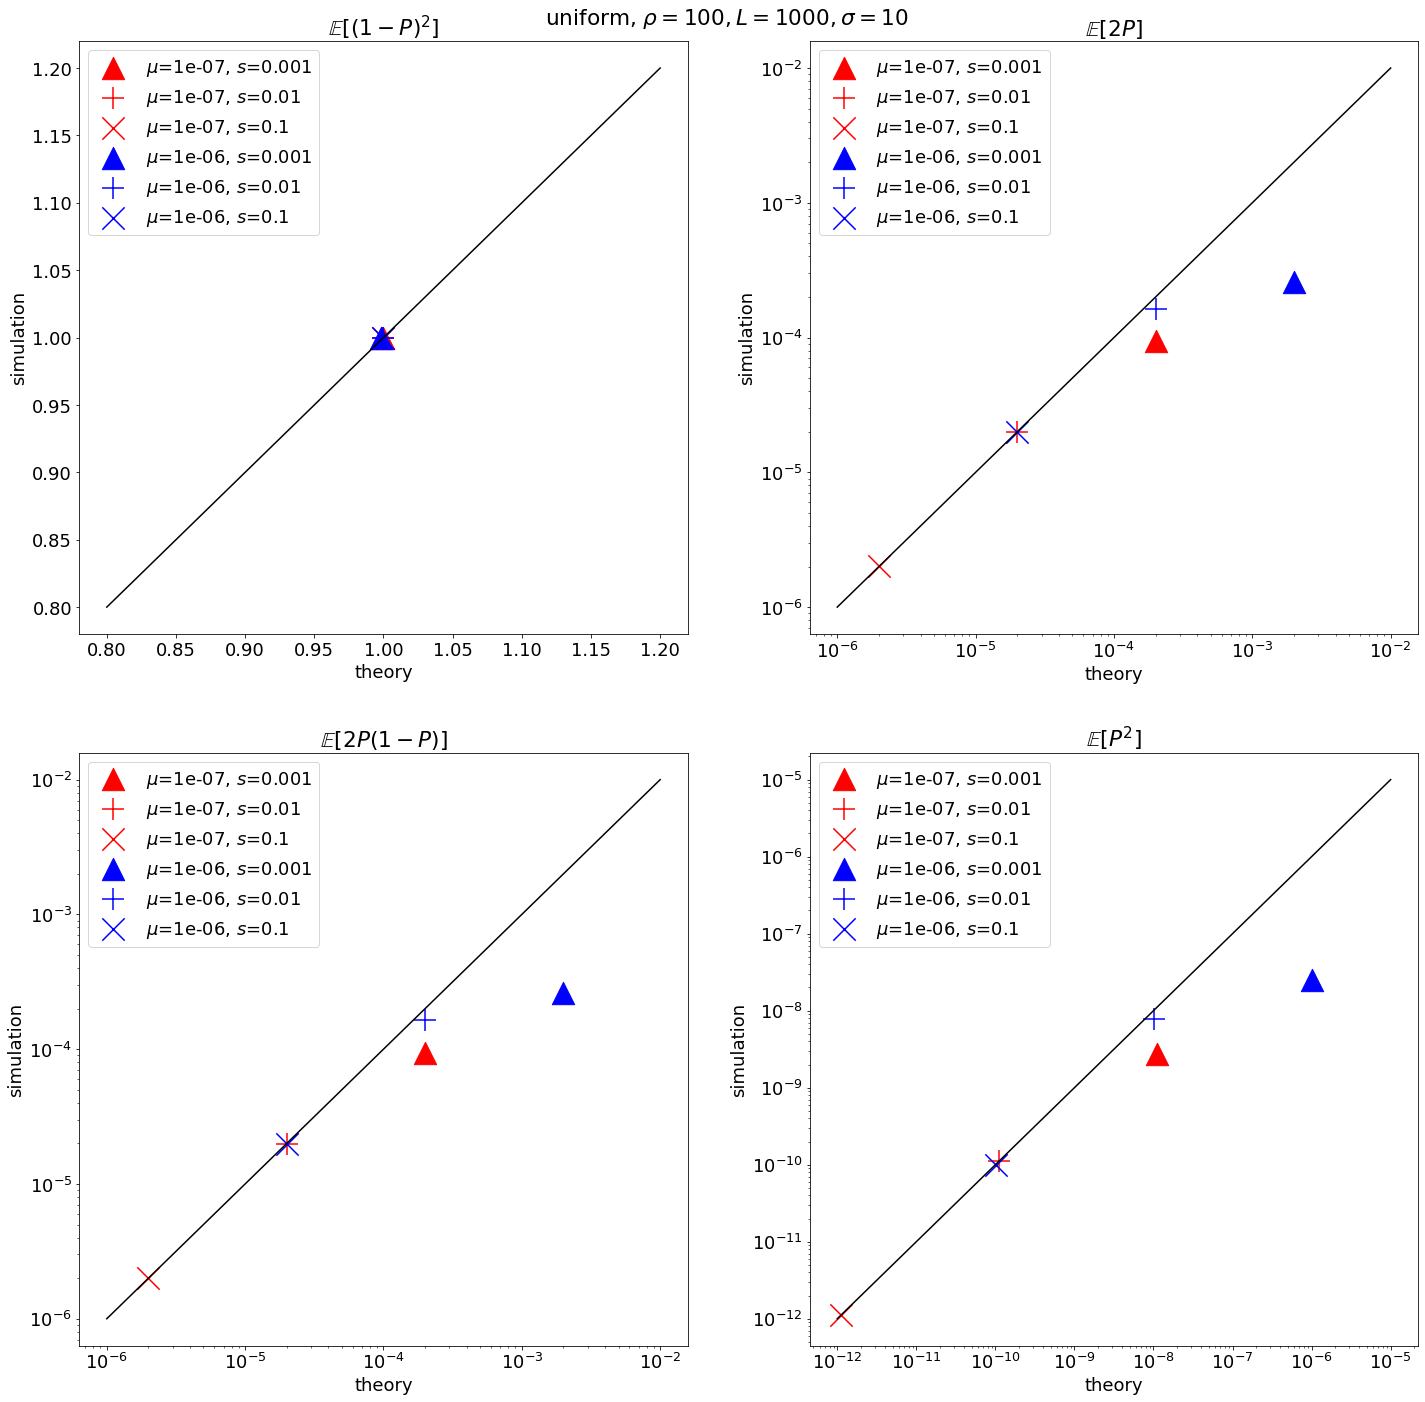

In [98]:
files_unif = glob.glob("../results/uniform/*n2_*rho100*.sfs")
plot_moments_unif(files_unif,'uniform, '+r'$\rho=100,L=1000,\sigma=10$')

### Spatial

In [72]:
### functions

def get_lc_squared(sigma,s):
    return sigma**2/s

def get_EPsquared(mu,s,rho,sigma,u2):
    return (mu/s)**2 +((2*mu)/((s**2)*rho*get_lc_squared(sigma,s)))*u2

def get_closest_index(df,w):
    diff = abs(df['w']-w)
    return diff.idxmin()

def get_mean_count(sfs):
    mean = sum(x * p for x, p in enumerate(sfs))
    return mean

def get_moments(files,spatial_integrals_file):
    spatial_integrals = pd.read_csv(spatial_integrals_file)
    res = np.zeros((len(files),10))
    for i,f in enumerate(files):
        matches = re.match(r'.*/s([\d.]+)_n(\d+)_mu([\d.e-]+)_rho(\d+)_L(\d+)_maxcount(\d+)_sigma([\d.]+)_seed(\d+)_iter(\d+)_r([\d.]+)_gaussian_w(\d+)\.sfs',f)
        s, n, mu, rho, L, maxcount, sigma, seed, iteration, r, w = matches.groups()
        s = float(s)
        mu = float(mu)
        rho = int(rho)
        sigma = float(sigma)
        w = float(w)
        w_tilde = w/np.sqrt(get_lc_squared(sigma,s))
        theory_u2 = spatial_integrals.iloc[get_closest_index(spatial_integrals,w_tilde),1]
        sim_data = pd.read_csv(f,header=None)
        res[i,:] = [s,mu,rho,sigma,get_EP(mu,s),get_EPsquared(mu,s,rho,sigma,theory_u2),sim_data.iloc[0,0],sim_data.iloc[1,0],sim_data.iloc[2,0],get_mean_count(sim_data[0].tolist())]

    res = pd.DataFrame(res,columns=['s','mu','rho','sigma','theory_firstmoment','theory_secondmoment','xi0','xi1','xi2','mean_count'])
    res['theory_xi0'] = 1-2*res['theory_firstmoment']+res['theory_secondmoment']
    res['theory_xi1'] = 2*res['theory_firstmoment']-2*res['theory_secondmoment']
    res['theory_xi2'] = res['theory_secondmoment']
    res['theory_xi2'] = res['theory_secondmoment']
    res['theory_meancount'] = 2*res['theory_firstmoment']
    
    return res
    
def plot_moments(files,spatial_integrals_file,title="Moments: sim vs theory"):
    res = get_moments(files,spatial_integrals_file)
    unique_rho_values = sorted(res['rho'].unique())
    unique_mu_values = sorted(res['mu'].unique())
    colors = ['red','blue','green']
    color_dict = dict(zip(unique_mu_values, colors))
    marker_shapes = ["^",'+','x']
    
    fig,axs = plt.subplots(2,2,figsize=(24,24))
    legend_handles = []
    for i, mu_value in enumerate(sorted(res['mu'].unique())):
            res_mu = res[(res['mu'] == mu_value)]
            for j, s_value in enumerate(sorted(res['s'].unique())):
                res_s = res_mu[res_mu['s'] == s_value]
                marker_size = 500#5000/(-np.log10(mu_value))
                label=r'$\mu$='+str(mu_value)+r', $s$='+str(s_value)
                axs[0,0].scatter(res_s['theory_xi0'], res_s['xi0'], color=color_dict[mu_value], label=label, marker=marker_shapes[j], s=marker_size)
                axs[0,1].scatter(res_s['theory_meancount'],res_s['mean_count'],color=color_dict[mu_value], label=label, marker=marker_shapes[j], s=marker_size)
                axs[1,0].scatter(res_s['theory_xi1'], res_s['xi1'], color=color_dict[mu_value], label=label, marker=marker_shapes[j], s=marker_size)
                axs[1,1].scatter(res_s['theory_xi2'], res_s['xi2'], color=color_dict[mu_value], label=label, marker=marker_shapes[j], s=marker_size)
                
    axs[0,0].plot(np.logspace(np.log10(0.8),np.log10(1.2)),np.logspace(np.log10(0.8),np.log10(1.2)),color='black')
    axs[0,0].set_xlabel("theory")
    axs[0,0].set_ylabel("simulation")
    axs[0,0].legend()
    axs[0,0].set_title(r"$\mathbb{E}[(1-P)^2]$")

    axs[0,1].plot(np.logspace(-6,-2),np.logspace(-6,-2),color='black')
    axs[0,1].set_xscale('log')
    axs[0,1].set_yscale('log')
    axs[0,1].set_xlabel("theory")
    axs[0,1].set_ylabel("simulation")
    axs[0,1].legend()
    axs[0,1].set_title(r"$\mathbb{E}[2P]$")

    axs[1,0].plot(np.logspace(-6,-2),np.logspace(-6,-2),color='black')
    axs[1,0].set_xscale('log')
    axs[1,0].set_yscale('log')
    axs[1,0].set_xlabel("theory")
    axs[1,0].set_ylabel("simulation")
    axs[1,0].legend()
    axs[1,0].set_title(r"$\mathbb{E}[2P(1-P)]$")
    
    axs[1,1].plot(np.logspace(-12,-5),np.logspace(-12,-5),color='black')
    axs[1,1].set_xscale('log')
    axs[1,1].set_yscale('log')
    axs[1,1].set_xlabel("theory")
    axs[1,1].set_ylabel("simulation")
    axs[1,1].legend()
    axs[1,1].set_title(r"$\mathbb{E}[P^2]$")
    
    fig.suptitle(title,y=0.9)
    plt.show()
#     return res

In [73]:
plt.rcParams.update({'font.size': 18})

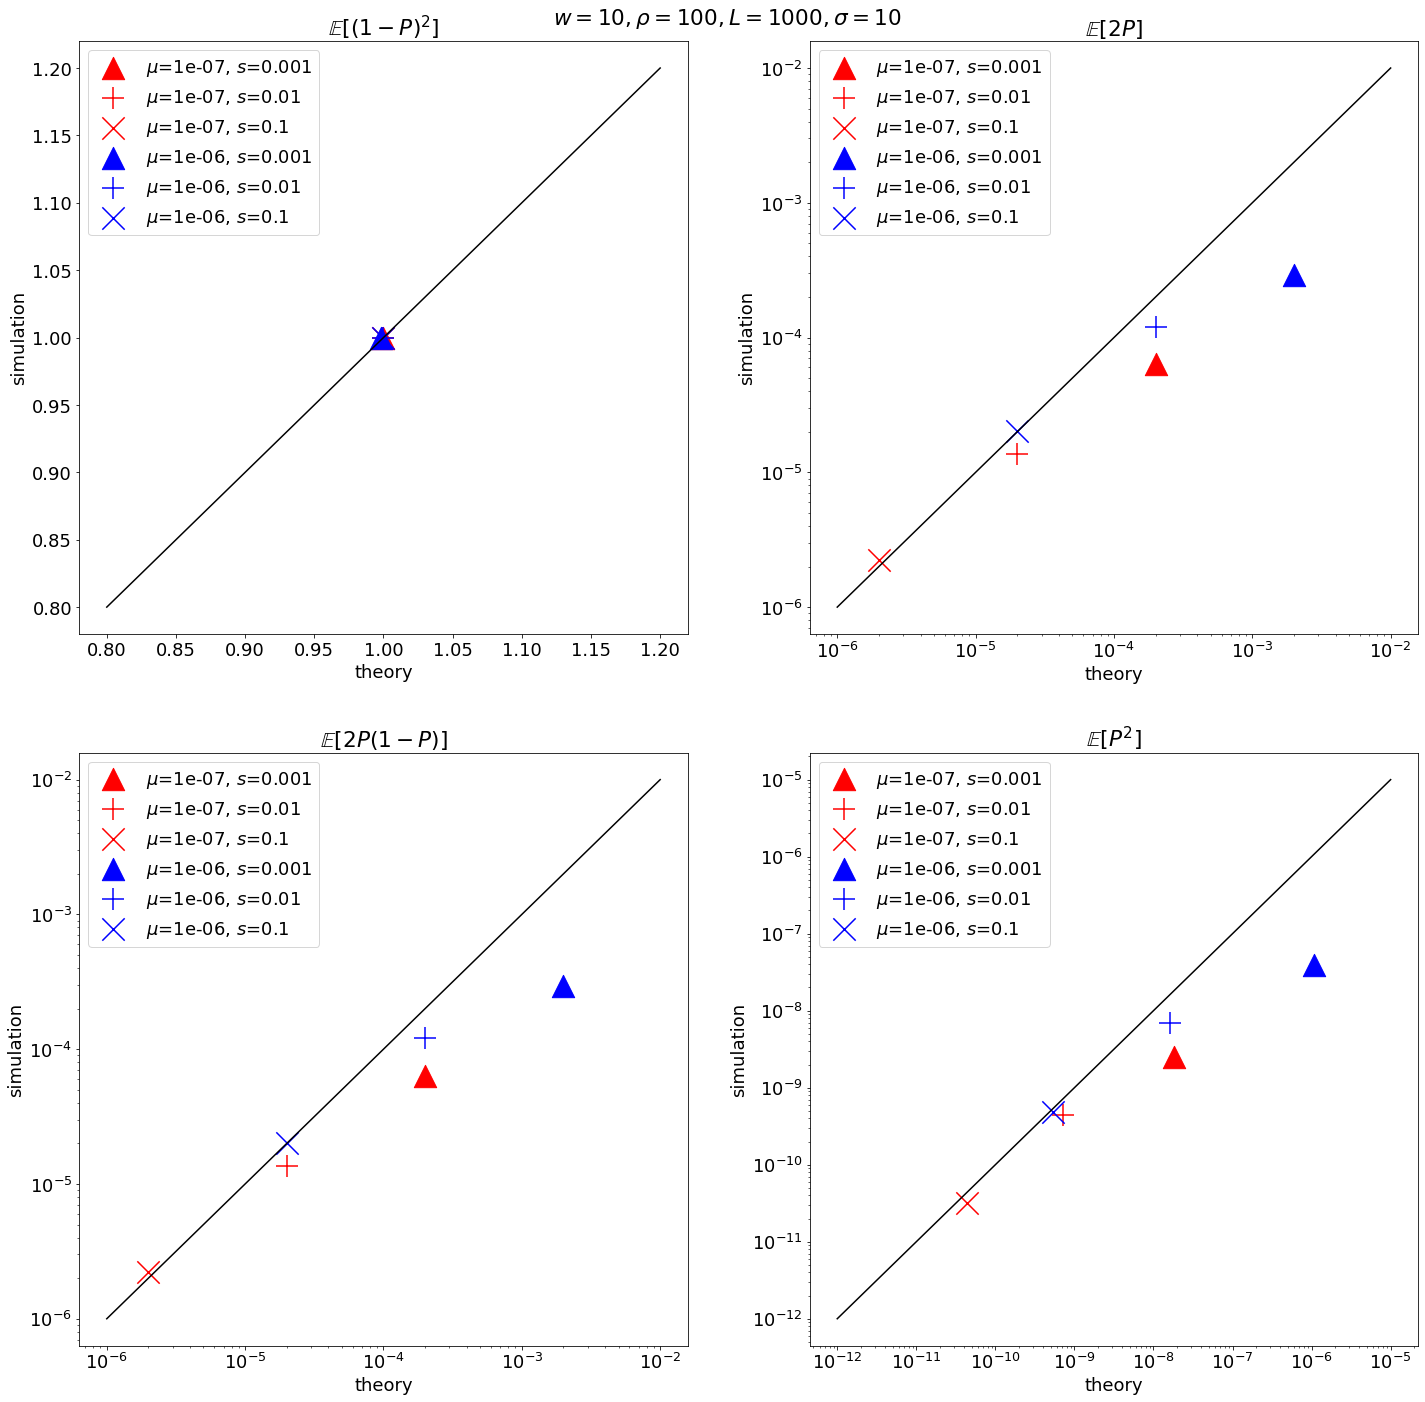

In [74]:
files_w10 = glob.glob("../results/gaussian_w10/*_n2_*.sfs")
plot_moments(files_w10,"../../theory/old_files/results/spatial_integrals_dim2.csv",r'$w=10,\rho=100,L=1000,\sigma=10$')

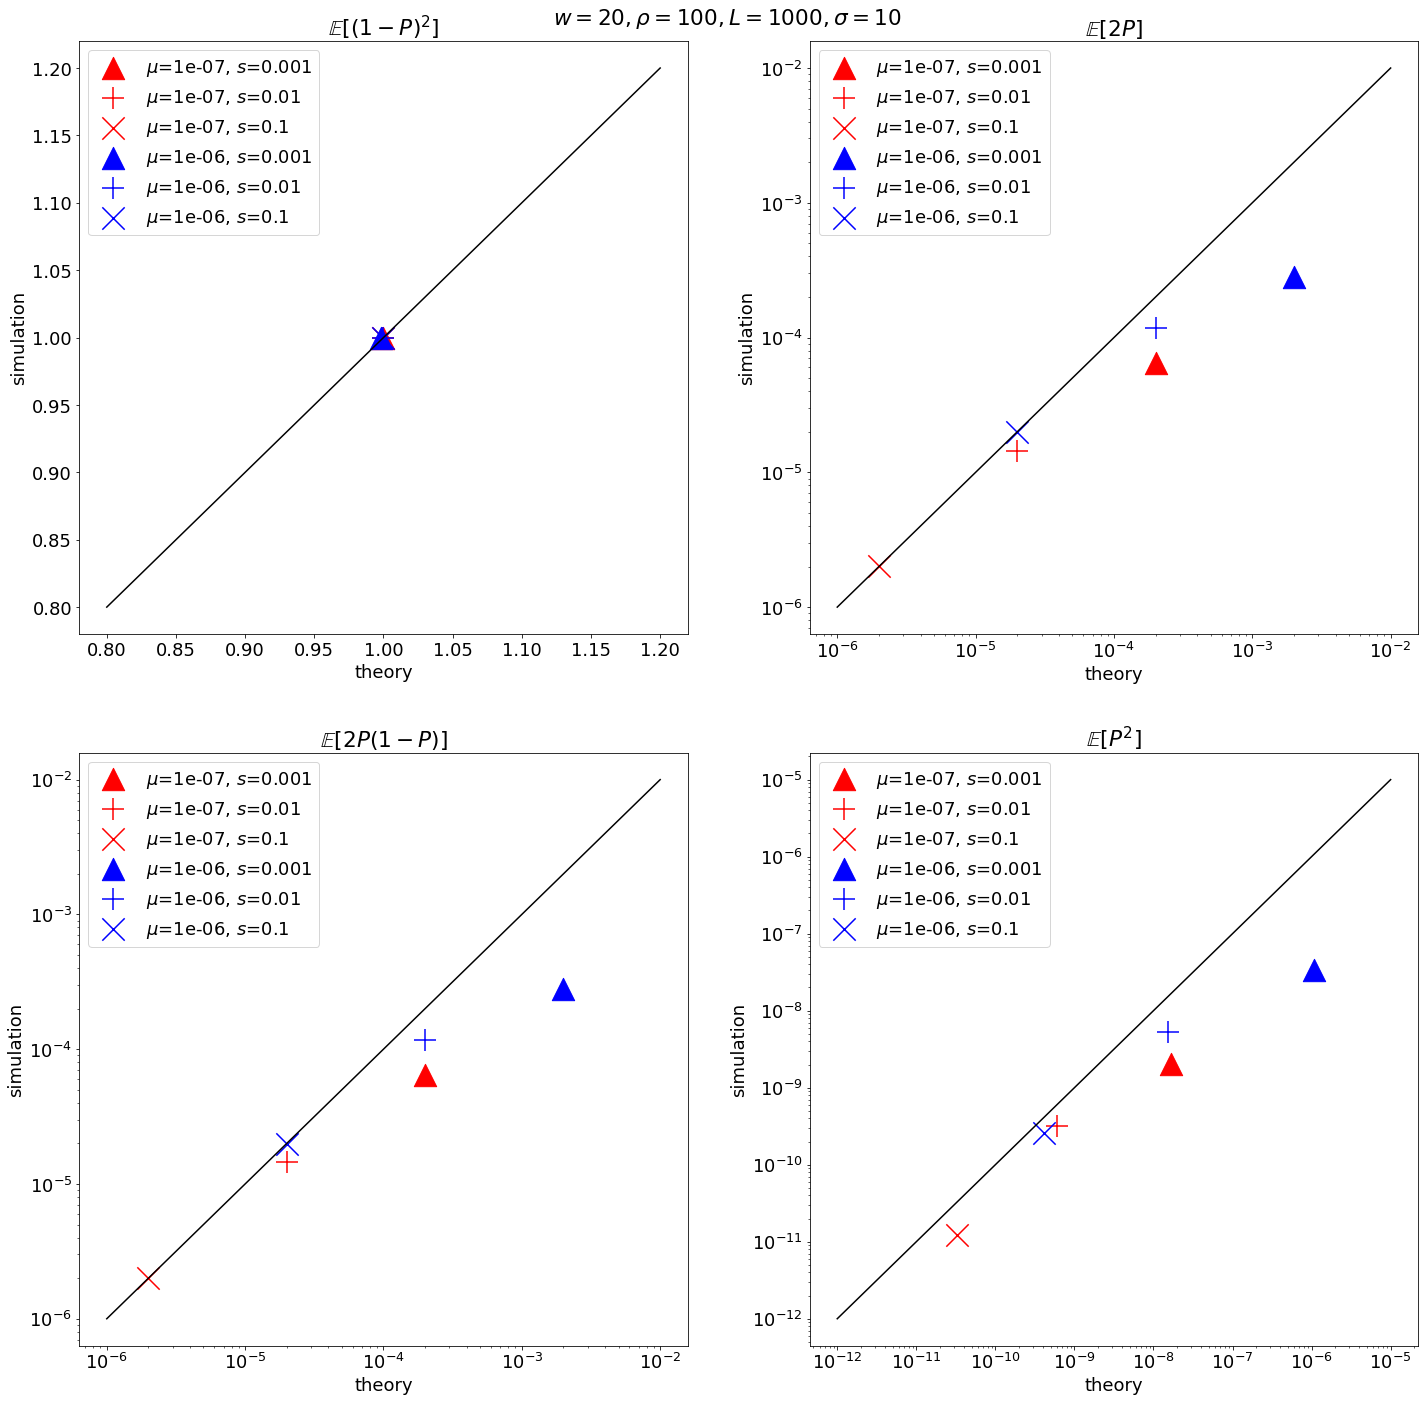

In [75]:
files_w20 = glob.glob("../results/gaussian_w20/*_n2_*.sfs")
plot_moments(files_w20,"../../theory/old_files/results/spatial_integrals_dim2.csv",r'$w=20,\rho=100,L=1000,\sigma=10$')

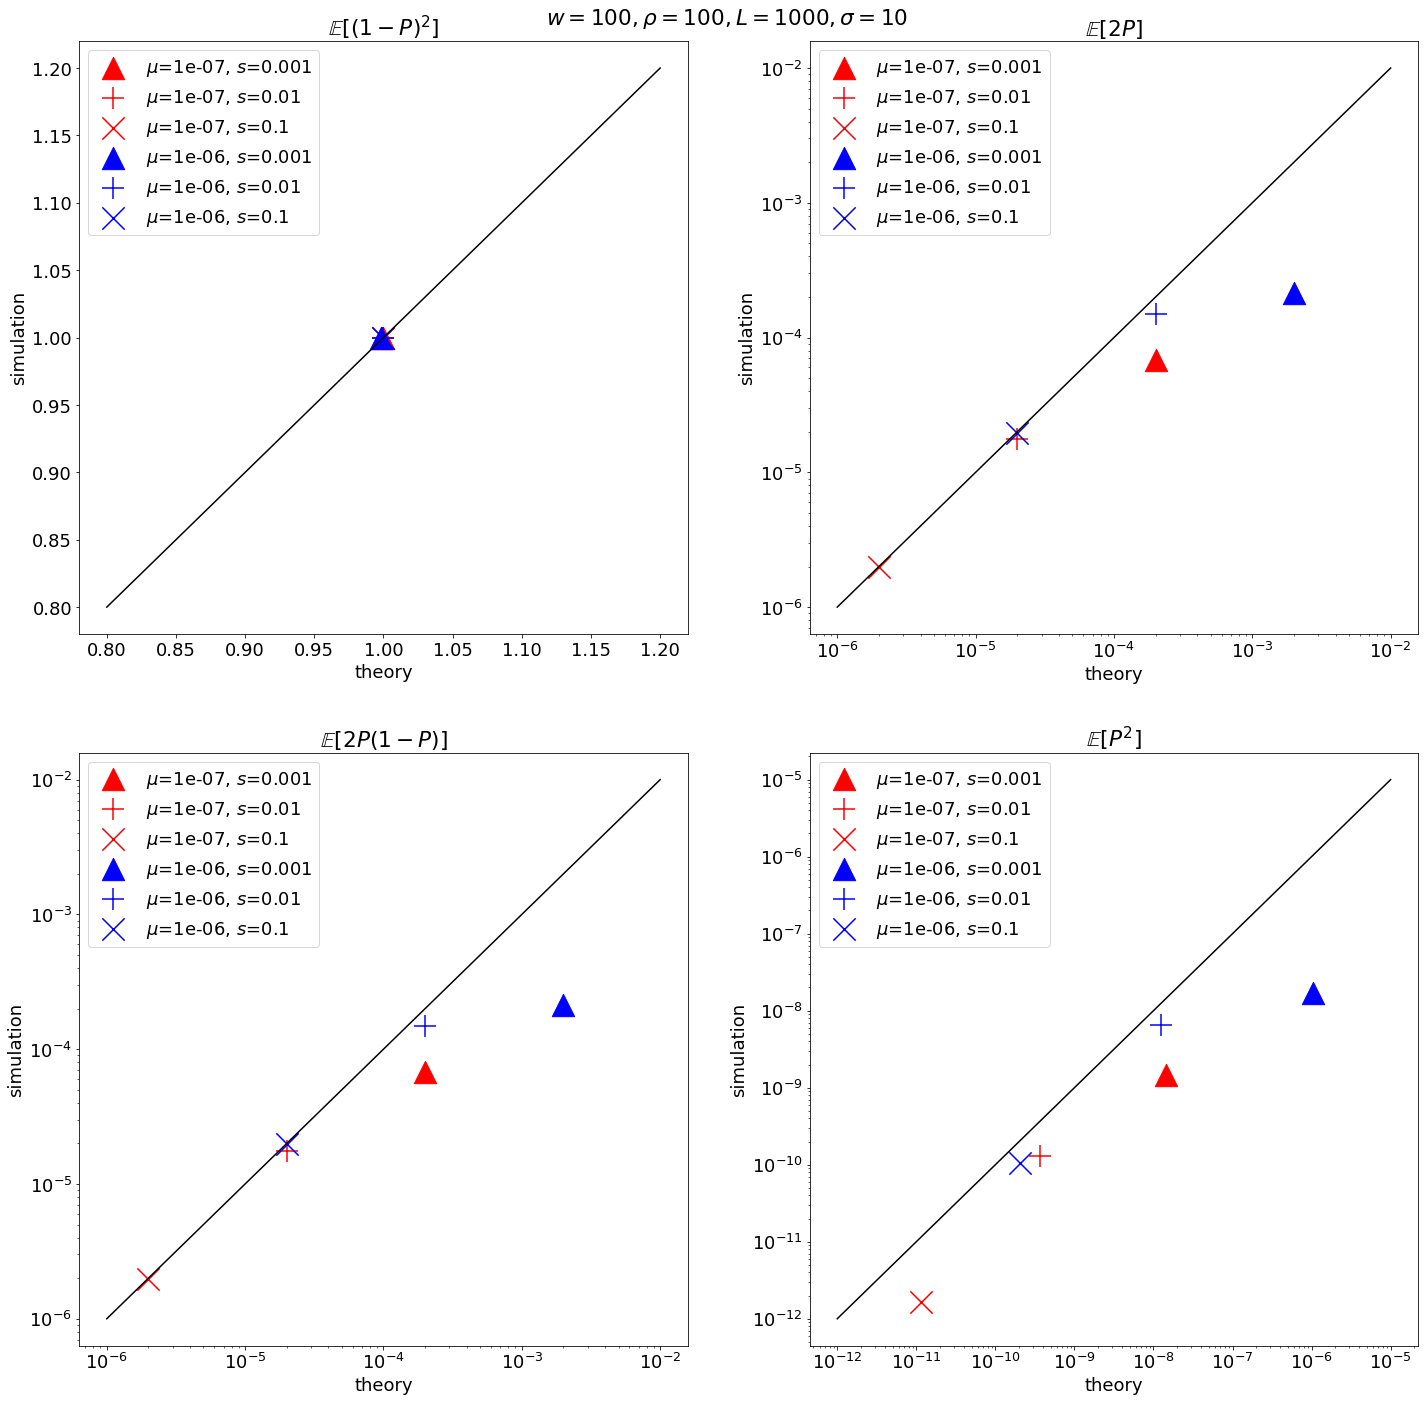

In [76]:
files_w100 = glob.glob("../results/gaussian_w100/*_n2_*.sfs")
plot_moments(files_w100,"../../theory/old_files/results/spatial_integrals_dim2.csv",r'$w=100,\rho=100,L=1000,\sigma=10$')

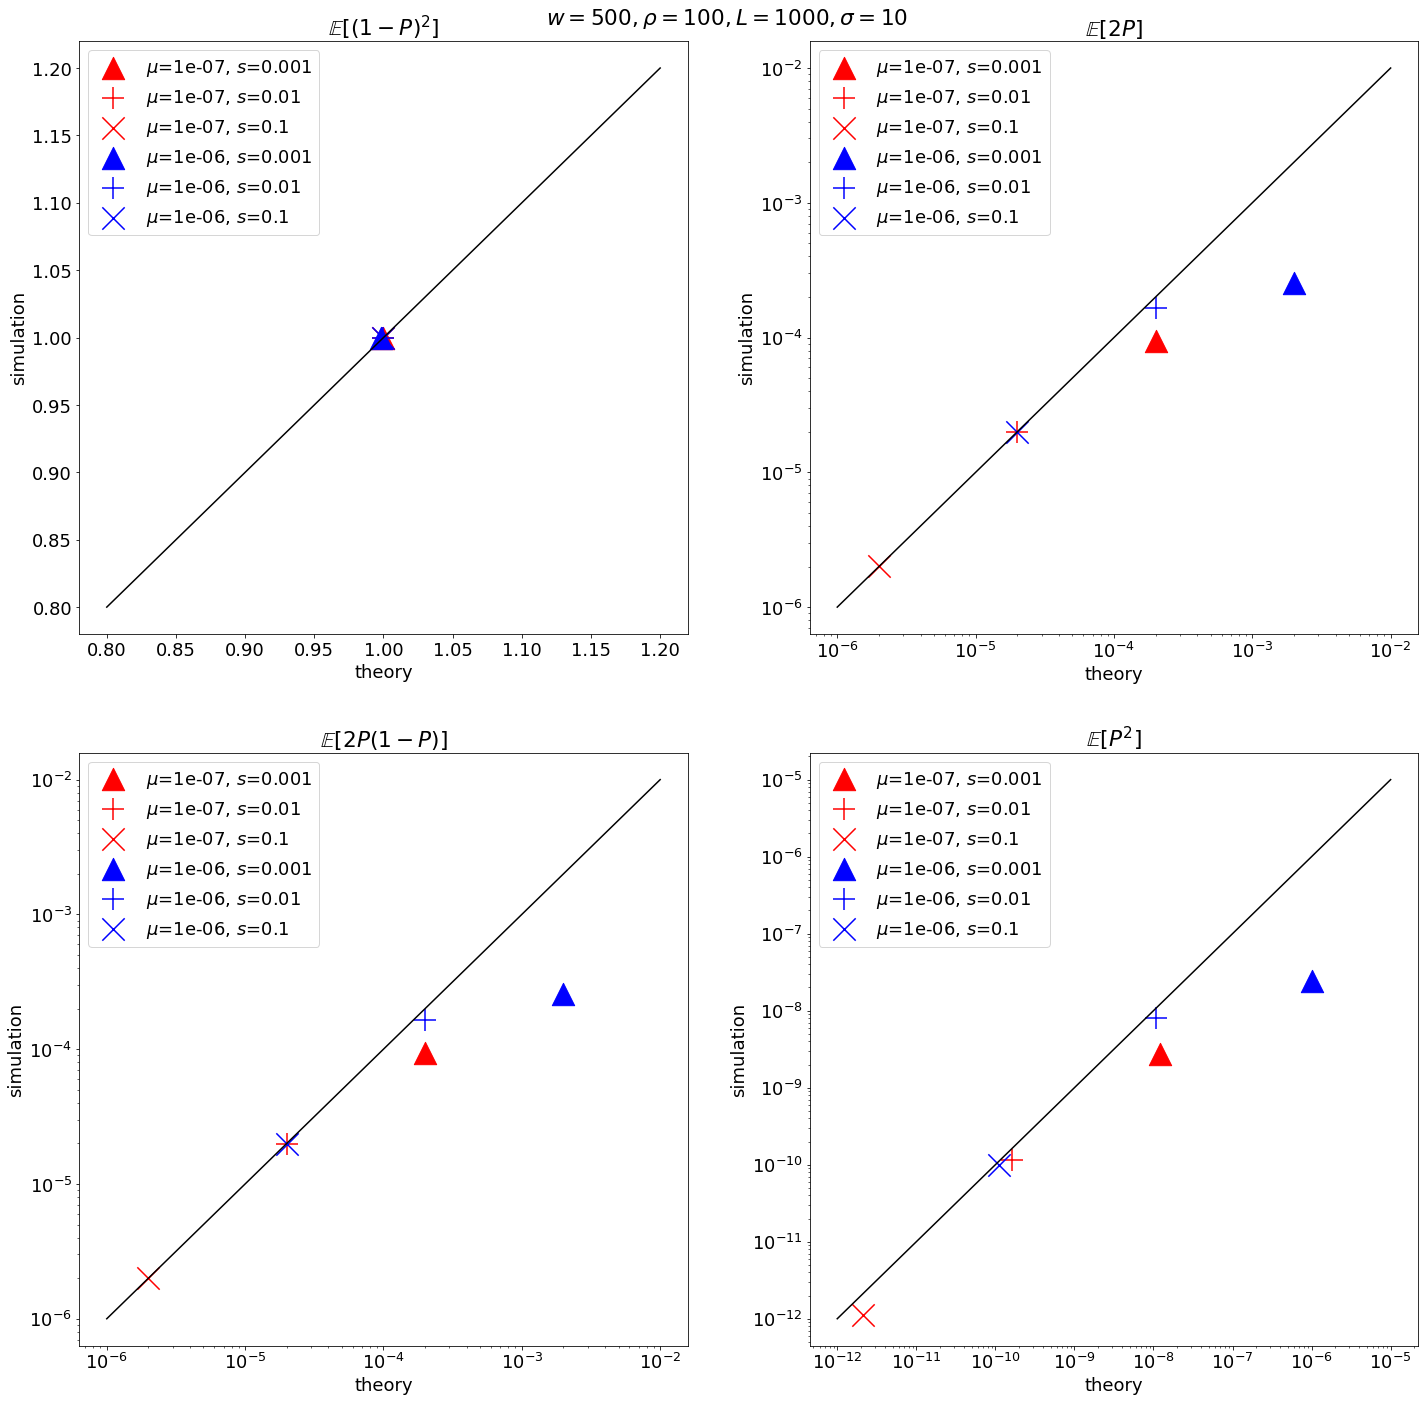

In [77]:
files_w500 = glob.glob("../results/gaussian_w500/*_n2_*.sfs")
plot_moments(files_w500,"../../theory/old_files/results/spatial_integrals_dim2.csv",r'$w=500,\rho=100,L=1000,\sigma=10$')

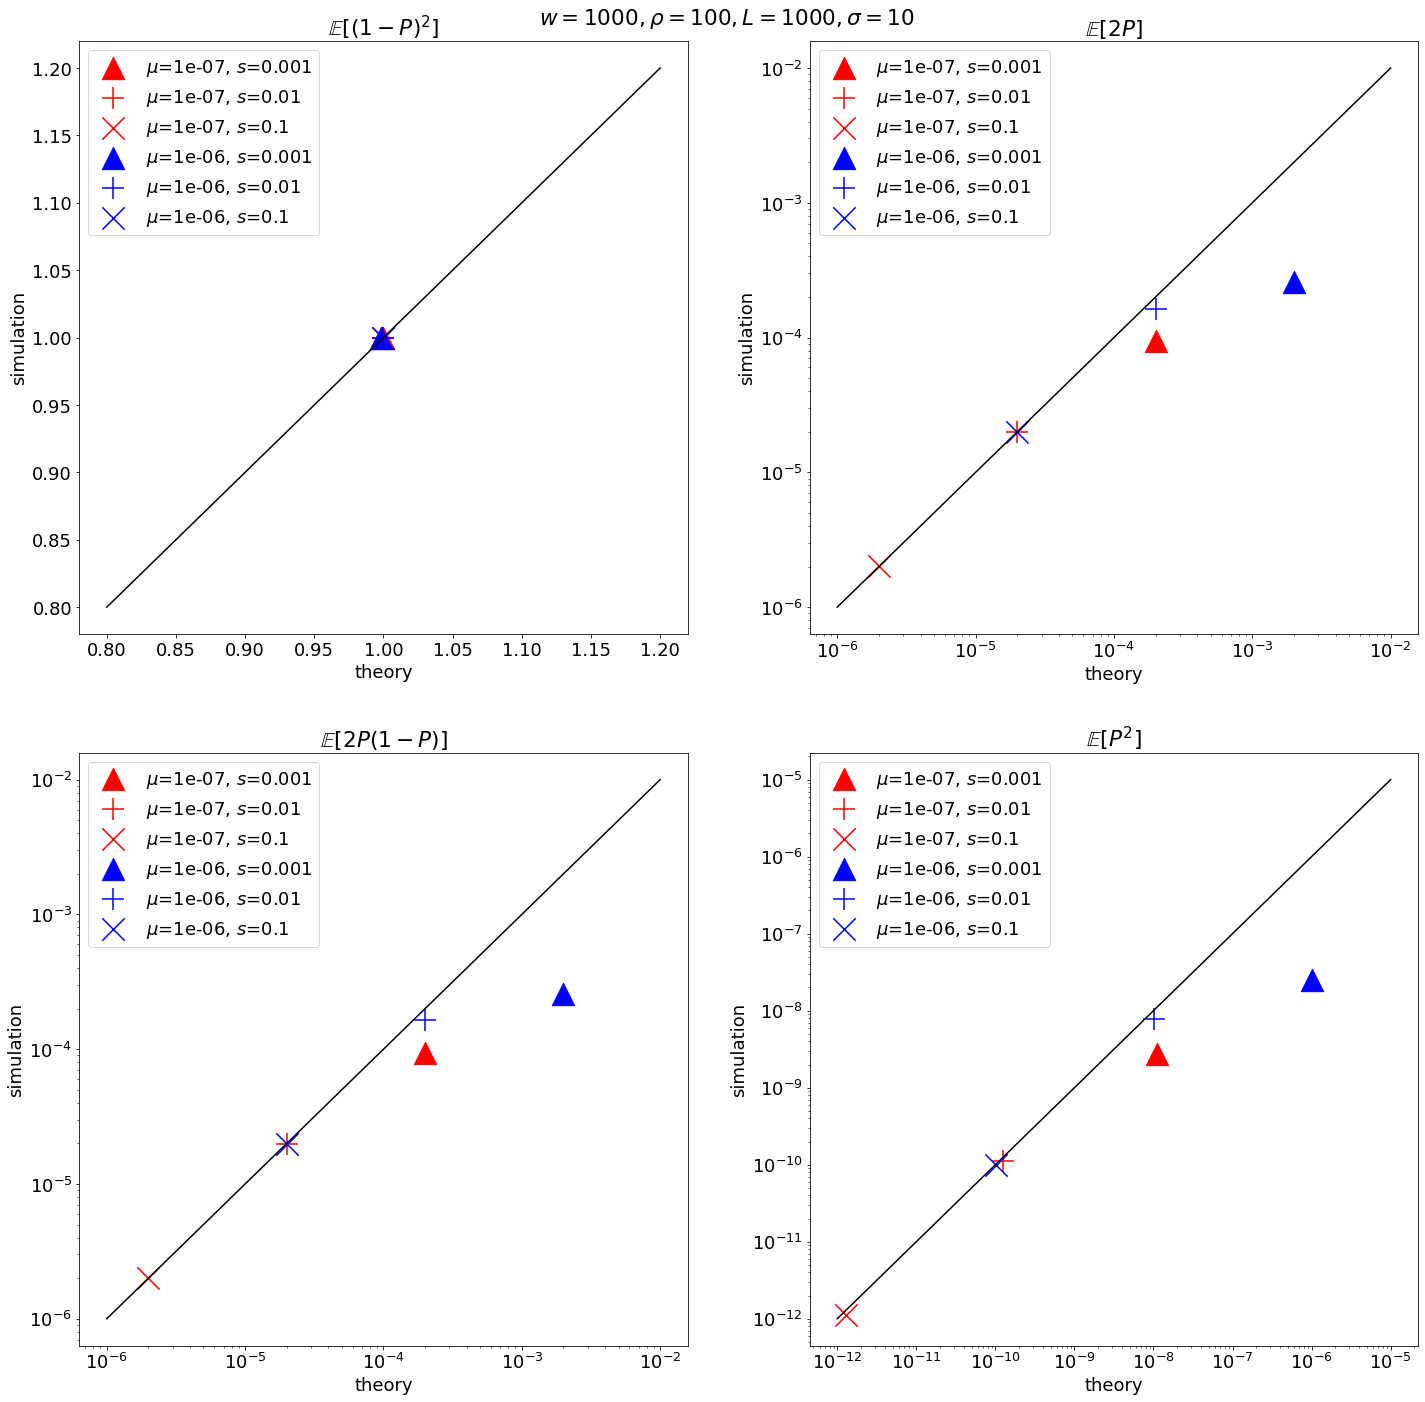

In [78]:
files_w1000 = glob.glob("../results/gaussian_w1000/*_n2_*.sfs")
plot_moments(files_w1000,"../../theory/old_files/results/spatial_integrals_dim2.csv",r'$w=1000,\rho=100,L=1000,\sigma=10$')

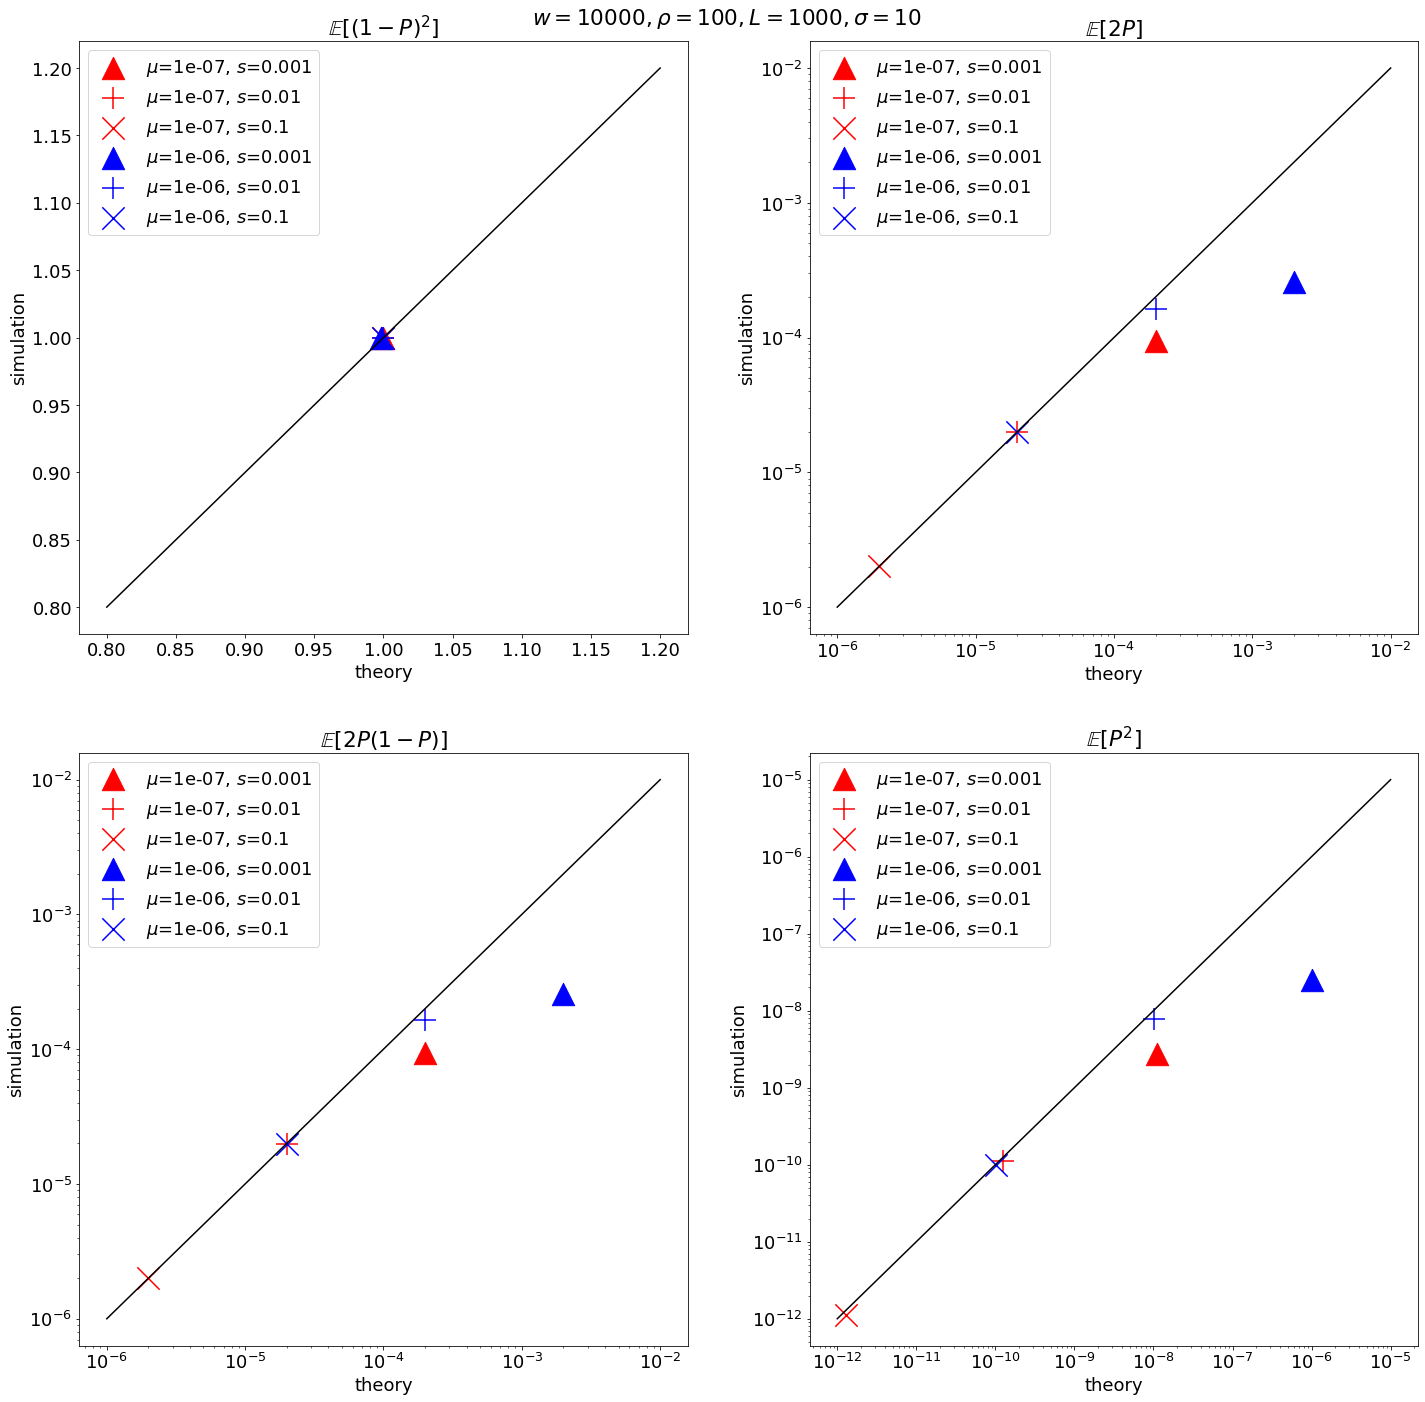

In [79]:
files_w10000 = glob.glob("../results/gaussian_w1000/*_n2_*.sfs")
plot_moments(files_w10000,"../../theory/old_files/results/spatial_integrals_dim2.csv",r'$w=10000,\rho=100,L=1000,\sigma=10$')

### Compare $w=10000$ and uniform

In [136]:
def matching_files(pattern,files1,files2):
    matching_files = []
    for file1 in files1:
        if pattern in file1:
            matching_files.append(file1)
    for file2 in files2:
        if pattern in file2:
            matching_files.append(file2)
    return matching_files

def get_moments_twosims(files_unif,files_spatial):
    res = np.zeros((len(files_unif),12))
    for i,f in enumerate(files_unif):
        matches = re.match(r'.*/s([\d.]+)_n(\d+)_mu([\d.e-]+)_rho(\d+)_L(\d+)_maxcount(\d+)_sigma([\d.]+)_seed(\d+)_iter(\d+)_r([\d.]+)',f)
        s, n, mu, rho, L, maxcount, sigma, seed, iteration, r = matches.groups()
        s = float(s)
        mu = float(mu)
        rho = int(rho)
        sigma = float(sigma)
        to_match = 's'+str(s)+'_n'+str(n)+'_mu'+str(mu)#+'_rho'+str(rho)+'_L'+str(L)+'_maxcount10000_sigma10'
        paired_files = matching_files(to_match,files_unif,files_spatial)
        sim_data_unif = pd.read_csv(paired_files[0],header=None)
        sim_data_spatial = pd.read_csv(paired_files[1],header=None)
        res[i,:] = [s,mu,rho,sigma,sim_data_unif.iloc[0,0],sim_data_unif.iloc[1,0],sim_data_unif.iloc[2,0],get_mean_count(sim_data_unif[0].tolist()),sim_data_spatial.iloc[0,0],sim_data_spatial.iloc[1,0],sim_data_spatial.iloc[2,0],get_mean_count(sim_data_spatial[0].tolist())]      
              
        #res[i,:] = [s,mu,rho,sigma,get_EP(mu,s),get_EPsquared(mu,s,rho,sigma,theory_u2),sim_data.iloc[0,0],sim_data.iloc[1,0],sim_data.iloc[2,0],get_mean_count(sim_data[0].tolist())]

    res = pd.DataFrame(res,columns=['s','mu','rho','sigma','xi0_unif','xi1_unif','xi2_unif','mean_count_unif','xi0_spatial','xi1_spatial','xi2_spatial','mean_count_spatial'])
    return res
    
def plot_moments_twosims(files_unif,files_spatial,title="Moments: uniform vs. spatial (very broad sample) simulations"):
    res = get_moments_twosims(files_unif,files_spatial)
    unique_rho_values = sorted(res['rho'].unique())
    unique_mu_values = sorted(res['mu'].unique())
    colors = ['red','blue','green']
    color_dict = dict(zip(unique_mu_values, colors))
    marker_shapes = ["^",'+','x']
    
    fig,axs = plt.subplots(2,2,figsize=(24,24))
    legend_handles = []
    for i, mu_value in enumerate(sorted(res['mu'].unique())):
            res_mu = res[(res['mu'] == mu_value)]
            for j, s_value in enumerate(sorted(res['s'].unique())):
                res_s = res_mu[res_mu['s'] == s_value]
                marker_size = 500#5000/(-np.log10(mu_value))
                label=r'$\mu$='+str(mu_value)+r', $s$='+str(s_value)
                axs[0,0].scatter(res_s['xi0_unif'], res_s['xi0_spatial'], color=color_dict[mu_value], label=label, marker=marker_shapes[j], s=marker_size)
                axs[0,1].scatter(res_s['mean_count_unif'],res_s['mean_count_spatial'],color=color_dict[mu_value], label=label, marker=marker_shapes[j], s=marker_size)
                axs[1,0].scatter(res_s['xi1_unif'], res_s['xi1_spatial'], color=color_dict[mu_value], label=label, marker=marker_shapes[j], s=marker_size)
                axs[1,1].scatter(res_s['xi2_unif'], res_s['xi2_spatial'], color=color_dict[mu_value], label=label, marker=marker_shapes[j], s=marker_size)
                
    axs[0,0].plot(np.logspace(np.log10(0.8),np.log10(1.2)),np.logspace(np.log10(0.8),np.log10(1.2)),color='black')
    axs[0,0].set_xlabel("uniform")
    axs[0,0].set_ylabel("spatial")
    axs[0,0].legend()
    axs[0,0].set_title(r"$\mathbb{E}[(1-P)^2]$")

    axs[0,1].plot(np.logspace(-6,-2),np.logspace(-6,-2),color='black')
    axs[0,1].set_xscale('log')
    axs[0,1].set_yscale('log')
    axs[0,1].set_xlabel("uniform")
    axs[0,1].set_ylabel("spatial")
    axs[0,1].legend()
    axs[0,1].set_title(r"$\mathbb{E}[2P]$")

    axs[1,0].plot(np.logspace(-6,-2),np.logspace(-6,-2),color='black')
    axs[1,0].set_xscale('log')
    axs[1,0].set_yscale('log')
    axs[1,0].set_xlabel("uniform")
    axs[1,0].set_ylabel("spatial")
    axs[1,0].legend()
    axs[1,0].set_title(r"$\mathbb{E}[2P(1-P)]$")
    
    axs[1,1].plot(np.logspace(-12,-5),np.logspace(-12,-5),color='black')
    axs[1,1].set_xscale('log')
    axs[1,1].set_yscale('log')
    axs[1,1].set_xlabel("uniform")
    axs[1,1].set_ylabel("spatial")
    axs[1,1].legend()
    axs[1,1].set_title(r"$\mathbb{E}[P^2]$")
    
    fig.suptitle(title,y=0.9)
    plt.show()

In [140]:
get_moments_twosims(files_unif,files_w10000)

,s,mu,rho,sigma,xi0_unif,xi1_unif,xi2_unif,mean_count_unif,xi0_spatial,xi1_spatial,xi2_spatial,mean_count_spatial
0,0.001,1.000000e-07,100.0,10.0,0.999906,0.000094,2.702652e-09,0.000094,0.999906,0.000094,2.709504e-09,0.000094
1,0.100,1.000000e-06,100.0,10.0,0.999980,0.000020,9.932959e-11,0.000020,0.999980,0.000020,9.935655e-11,0.000020
2,0.010,1.000000e-07,100.0,10.0,0.999980,0.000020,1.118798e-10,0.000020,0.999980,0.000020,1.125940e-10,0.000020
3,0.001,1.000000e-06,100.0,10.0,0.999741,0.000259,2.505690e-08,0.000259,0.999742,0.000258,2.488295e-08,0.000258
4,0.100,1.000000e-07,100.0,10.0,0.999998,0.000002,1.110432e-12,0.000002,0.999998,0.000002,1.110705e-12,0.000002
5,0.010,1.000000e-06,100.0,10.0,0.999836,0.000164,7.832398e-09,0.000164,0.999836,0.000164,7.860945e-09,0.000164


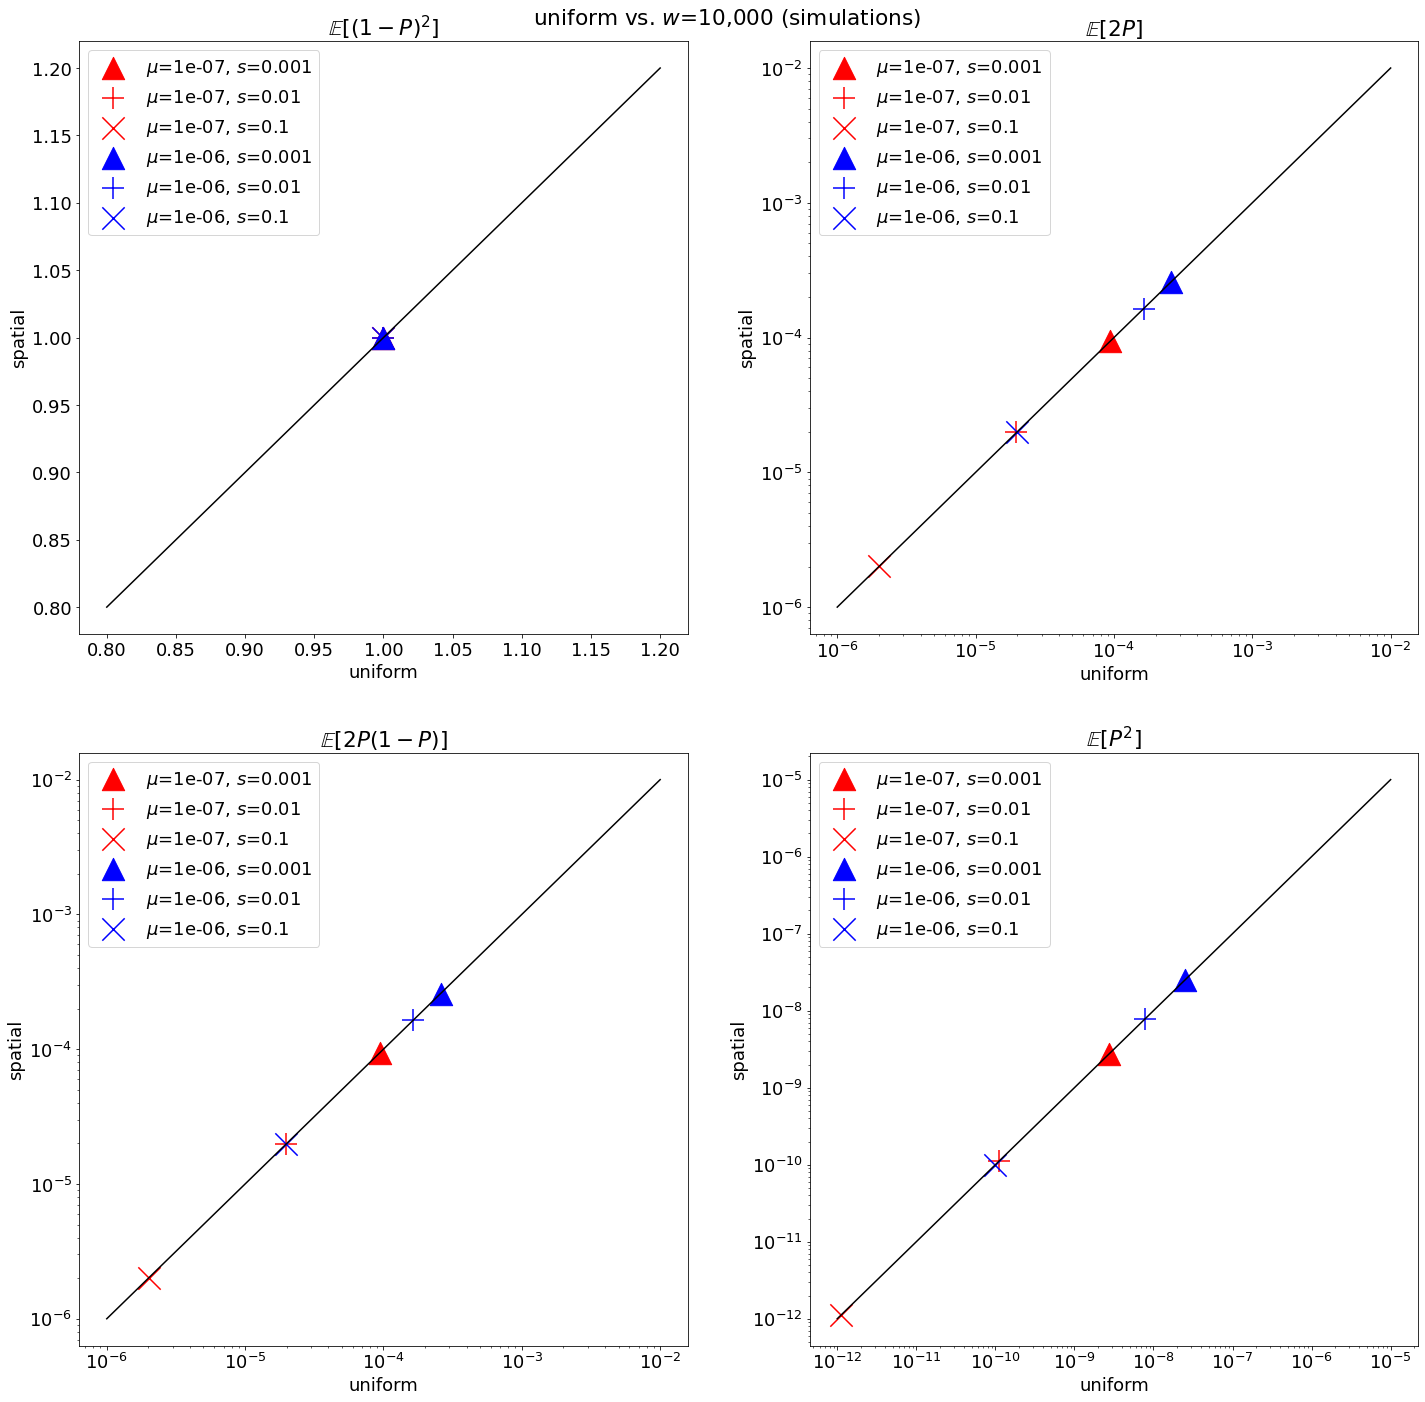

In [141]:
plot_moments_twosims(files_unif,files_w10000,r'uniform vs. $w$=10,000 (simulations)')